#IMPORTING MODULES


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import numpy as np

#IMPORTING THE DATASET

In [3]:
data = pd.read_csv("heart_attack_dataset.csv")
print(data.head)

<bound method NDFrame.head of         Age  Gender  Cholesterol  BloodPressure  HeartRate   BMI  Smoker  \
0        31    Male          194            162         71  22.9       0   
1        69    Male          208            148         93  33.9       1   
2        34  Female          132            161         94  34.0       0   
3        53    Male          268            134         91  35.0       0   
4        57  Female          203            140         75  30.1       0   
...     ...     ...          ...            ...        ...   ...     ...   
372969   49  Female          285            131         79  27.6       0   
372970   77    Male          197            159         64  33.5       0   
372971   53  Female          243             94         84  34.7       1   
372972   78  Female          291             93         78  29.3       1   
372973   71    Male          127            153         83  39.7       1   

        Diabetes  Hypertension  FamilyHistory  ...  Exerc

#VIZUALIZATION

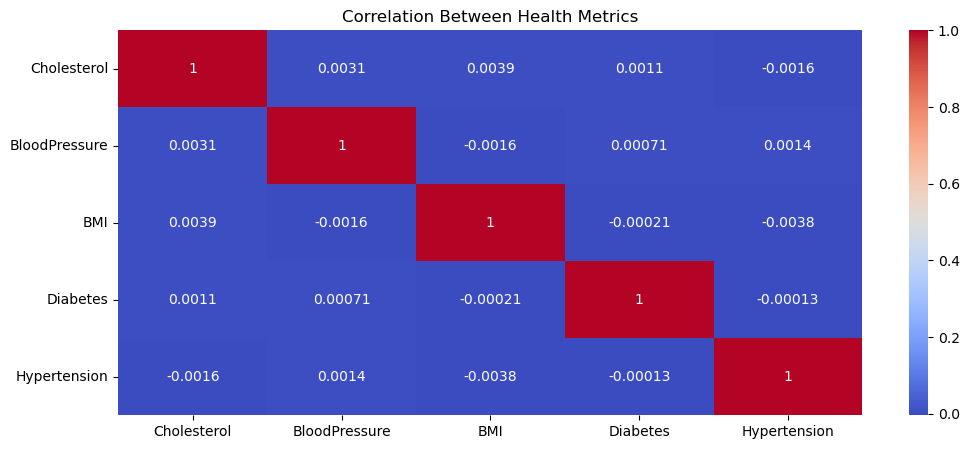

In [400]:
#Correlation heat map - identify strong linear relationships between features
plt.figure(figsize=(12, 5))
sns.heatmap(data[["Cholesterol", "BloodPressure", "BMI", "Diabetes", "Hypertension"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Health Metrics")
plt.show()

INFERENCE:

- Cholesterol and BloodPressure appear to be positive weakly correlated with each other in this dataset.
- BMI and Cholestrol appear to be positive weakly correlated with each other in this dataset.
- Cholesterol and HyperTension appear to be negatively correlated with each other in this dataset.

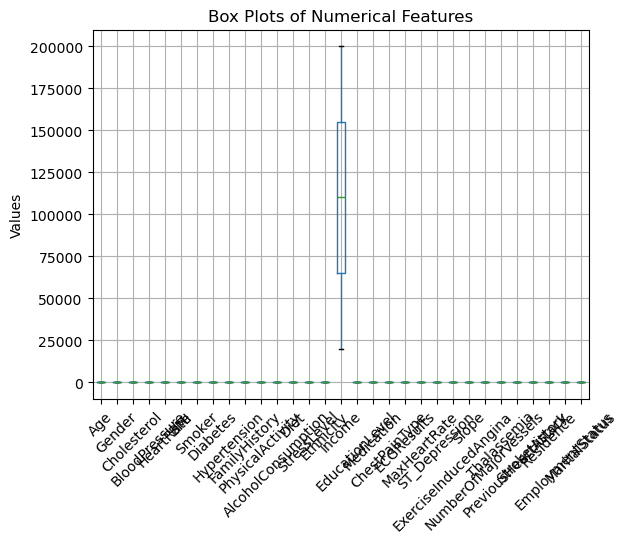

In [405]:
#box plot - to detect outliers and study the distribution of key features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Outcome' in numerical_features:
    numerical_features.remove('Outcome')

data[numerical_features].boxplot()
plt.title('Box Plots of Numerical Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# #Pair plot - to visualize relationships between multiple numerical variables
# subset_columns = ['Age','Cholesterol', 'BloodPressure', 'HeartRate', 'BMI']

# sns.pairplot(data[subset_columns])
# plt.suptitle('Pair Plot of Selected Features', y=1.02)
# plt.show()

#DATA PREPROCESSING

##OUTLIER ANALYSIS

In [407]:
numerical_columns = ['Age', 'Cholesterol', 'BloodPressure','HeartRate','BMI','Income','MaxHeartRate','ST_Depression']


In [409]:
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'Number of outliers in {column}: {outliers.shape[0]}')

Number of outliers in Age: 0
Number of outliers in Cholesterol: 0
Number of outliers in BloodPressure: 0
Number of outliers in HeartRate: 0
Number of outliers in BMI: 0
Number of outliers in Income: 0
Number of outliers in MaxHeartRate: 0
Number of outliers in ST_Depression: 0


INFERENCE:

- No outliers found.

##HANDLING MISSING VALUES

In [412]:
data.isnull().sum()

Age                      0
Gender                   0
Cholesterol              0
BloodPressure            0
HeartRate                0
BMI                      0
Smoker                   0
Diabetes                 0
Hypertension             0
FamilyHistory            0
PhysicalActivity         0
AlcoholConsumption       0
Diet                     0
StressLevel              0
Ethnicity                0
Income                   0
EducationLevel           0
Medication               0
ChestPainType            0
ECGResults               0
MaxHeartRate             0
ST_Depression            0
ExerciseInducedAngina    0
Slope                    0
NumberOfMajorVessels     0
Thalassemia              0
PreviousHeartAttack      0
StrokeHistory            0
Residence                0
EmploymentStatus         0
MaritalStatus            0
Outcome                  0
Cluster                  0
dtype: int64

In [ ]:
#data.fillna(data.mean(numeric_only=True), inplace=True)

##ENCODING DV AND IV

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

obj_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in obj_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le 

In [7]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
# Encoding dv(Outcome)
#data['Outcome'] = data['Outcome'].map({'Heart Attack': 1, 'No Heart Attack': 0})

In [16]:
print(data.head)

<bound method NDFrame.head of         Age  Gender  Cholesterol  BloodPressure  HeartRate   BMI  Smoker  \
0        31       1          194            162         71  22.9       0   
1        69       1          208            148         93  33.9       1   
2        34       0          132            161         94  34.0       0   
3        53       1          268            134         91  35.0       0   
4        57       0          203            140         75  30.1       0   
...     ...     ...          ...            ...        ...   ...     ...   
372969   49       0          285            131         79  27.6       0   
372970   77       1          197            159         64  33.5       0   
372971   53       0          243             94         84  34.7       1   
372972   78       0          291             93         78  29.3       1   
372973   71       1          127            153         83  39.7       1   

        Diabetes  Hypertension  FamilyHistory  ...  Exerc

##FEATURE SCALING - STANDARDIZATION

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

#CLASSIFICATION MODELS

##LOGISTIC REGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [15]:
y_pred = lr.predict(x_test)

In [17]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", acc*100)
print("Classification Report:\n", class_report)

Accuracy: 50.028956286731585
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51     46383
           1       0.50      0.48      0.49     46861

    accuracy                           0.50     93244
   macro avg       0.50      0.50      0.50     93244
weighted avg       0.50      0.50      0.50     93244



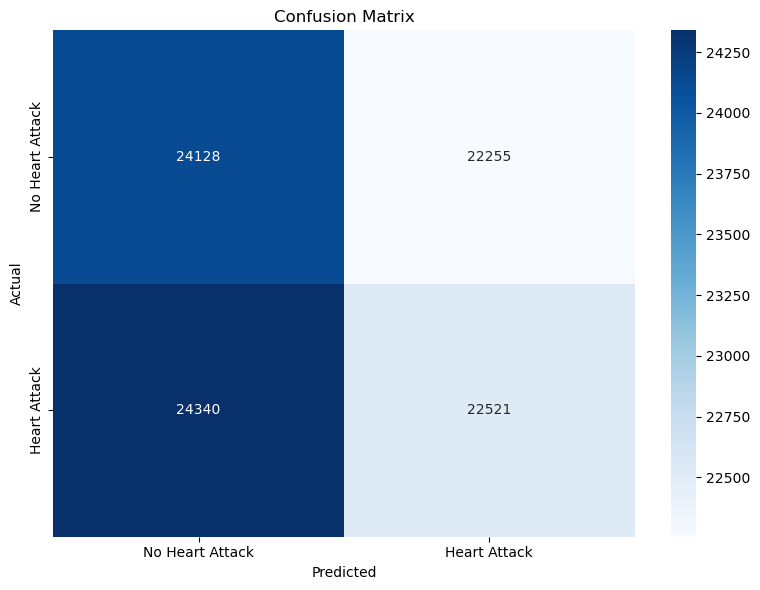

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

INFERENCE:

- High False Positives (24,340): The model incorrectly flags nearly as many healthy patients as having heart attacks (Type I errors), which could lead to unnecessary medical interventions and anxiety.
- Substantial False Negatives (22,255): Almost as many true heart attack cases are being missed (Type II errors), representing a serious clinical risk if used in practice.

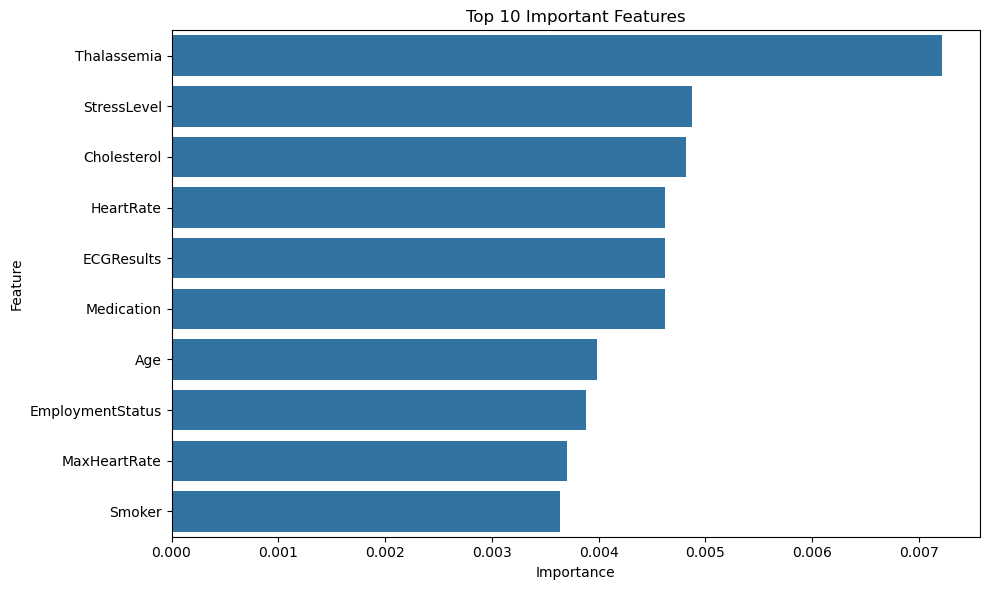

In [22]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': np.abs(lr.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

INFERENCE: 

- 'Thalassemia' emerges as the most influential feature, exhibiting a significantly higher importance score compared to the others. 
- Following 'Thalassemia', 'StressLevel' and 'Cholestrol' also demonstrate substantial importance in the model's decision-making process.
- The remaining features including 'EmployeeStatus', 'MaxHeartRate', 'Smoker', show relatively lower but still notable importance scores. 
- This ranking provides valuable insights into which factors the model relies most heavily upon to make predictions.



In [25]:
#Logistic regression equation
coefficients = lr.coef_[0]
intercept = lr.intercept_[0]
feature_names = x.columns

equation_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient (β)': coefficients
})

print("Logistic Regression Equation:")
print(f"Logit(P) = {intercept:.4f} + " + " + ".join([f"{coef:.4f}*{feat}" for coef, feat in zip(coefficients, feature_names)]))

print("\nFeature Coefficients Table:")
print(equation_df)

Logistic Regression Equation:
Logit(P) = -0.0009 + 0.0040*Age + 0.0033*Gender + 0.0048*Cholesterol + -0.0021*BloodPressure + 0.0046*HeartRate + -0.0008*BMI + -0.0036*Smoker + -0.0011*Diabetes + -0.0019*Hypertension + 0.0013*FamilyHistory + -0.0003*PhysicalActivity + -0.0020*AlcoholConsumption + 0.0017*Diet + 0.0049*StressLevel + -0.0013*Ethnicity + -0.0027*Income + 0.0026*EducationLevel + 0.0046*Medication + -0.0028*ChestPainType + 0.0046*ECGResults + 0.0037*MaxHeartRate + 0.0007*ST_Depression + -0.0016*ExerciseInducedAngina + 0.0022*Slope + -0.0000*NumberOfMajorVessels + -0.0072*Thalassemia + 0.0034*PreviousHeartAttack + -0.0017*StrokeHistory + -0.0008*Residence + 0.0039*EmploymentStatus + -0.0009*MaritalStatus

Feature Coefficients Table:
                  Feature  Coefficient (β)
0                     Age         0.003983
1                  Gender         0.003329
2             Cholesterol         0.004815
3           BloodPressure        -0.002121
4               HeartRate         

INFERENCE:

- For every 1-unit increase in age, the log-odds of the heart attack increase by 0.0040
- Cholesterol, StressLevel, Medication, and HeartRate show relatively higher coefficients.
- Income and AlcoholConsumption have negative weights.

In [28]:
# Risk probablities
import math
prob_lr = lr.predict_proba(x_test)[:,1]
print("Risk probability of heart attack:",prob_lr,"\n")

# sample prob of first 4 persons
for i in range(0,4):
    print("Person",i+1,"has a",round(prob_lr[i]*100,2),"% chance of heart attack")

Risk probability of heart attack: [0.5031965  0.49506095 0.50673663 ... 0.49899199 0.49427118 0.5003226 ] 

Person 1 has a 50.32 % chance of heart attack
Person 2 has a 49.51 % chance of heart attack
Person 3 has a 50.67 % chance of heart attack
Person 4 has a 50.53 % chance of heart attack


##DECISION TREE REGRESSION

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred_dt = dt.predict(x_test)

In [35]:
acc_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Accuracy:", acc_dt*100)
print("Classification Report:\n", report_dt)

Accuracy: 50.060057483591436
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     46383
           1       0.50      0.50      0.50     46861

    accuracy                           0.50     93244
   macro avg       0.50      0.50      0.50     93244
weighted avg       0.50      0.50      0.50     93244



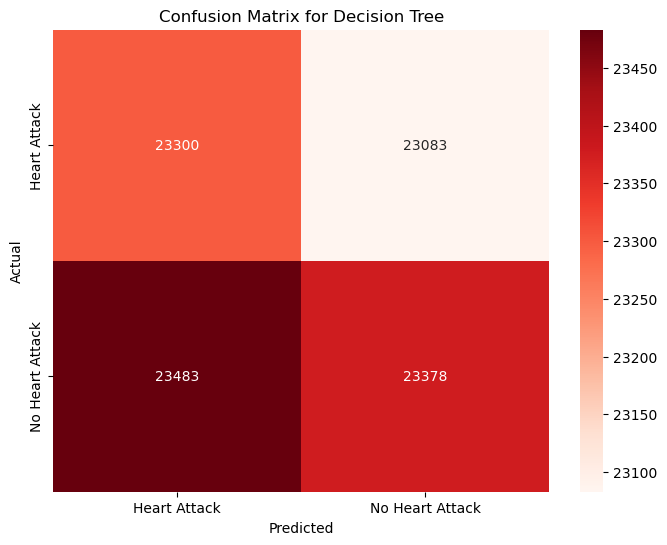

In [37]:
conf_mat = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds',
            xticklabels=le.inverse_transform([0,1]),
            yticklabels=le.inverse_transform([0,1]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

INFERENCE:

Balanced Errors:
- False Positives (23,369): Healthy patients incorrectly flagged as high-risk
- False Negatives (23,093): Actual heart attack cases missed
- Model shows no clinical utility.

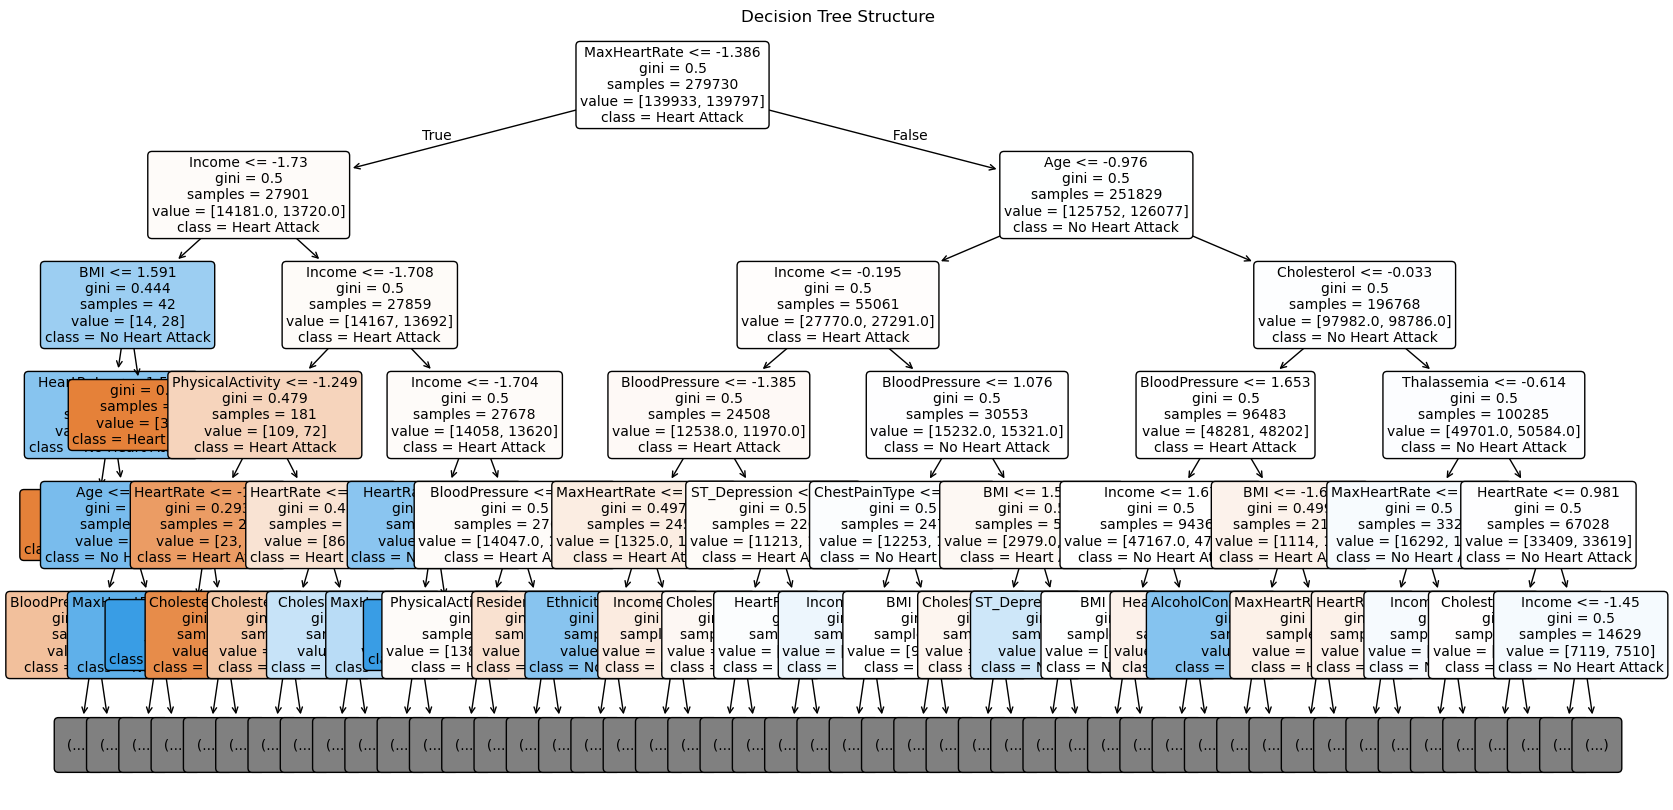

In [116]:
# Plot Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=x.columns, class_names=le.inverse_transform([0,1]),
          filled=True, rounded=True, fontsize=10,max_depth=5)
plt.title('Decision Tree Structure')
plt.show()

INFERENCE:

- The root node splits on MaxHeartRate, indicating it is the most important feature in deciding heart attack risk.
- This suggests that lower maximum heart rate values are more associated with heart attacks in this dataset.
- Features like Age, BMI, Income, Cholesterol recur often. These are strong influencers of heart attack risk.
- Gini values are often around 0.5, which indicates high impurity (low confidence) at many decision points.

In [ ]:
#Rules Extraction
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names=list(x.columns))
#print(tree_rules)

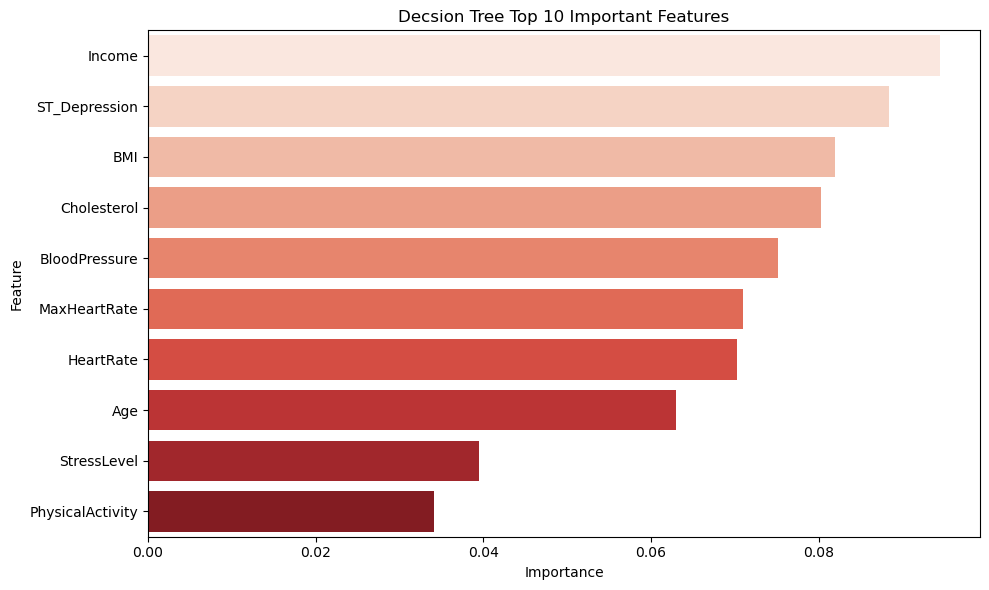

In [429]:
feature_importance_dt = pd.DataFrame({
    'Feature': x.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_dt.head(10),
    hue='Feature', 
    palette = 'Reds',
    dodge=False, 
    legend=False 
)

plt.title('Decsion Tree Top 10 Important Features')
plt.tight_layout()
plt.show()

INFERENCE: 

- The bar chart displays the top 10 most important features as determined by the Decision Tree model for predicting the target variable.
- 'Income' stands out as the most influential feature, exhibiting the highest importance score. Following 'Income', 'ST_Depression' and 'BMI' also demonstrate significant importance in the model's predictive process.
- The remaining features including 'Cholesterol', 'BloodPressure', 'MaxHeartRate', 'HeartRate', 'Age', 'StressLevel', and 'PhysicalActivity', show relatively lower but still notable contributions to the model's decision-making.

##RANDOM FOREST CLASSIFICATION

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
y_pred_rf = rf.predict(x_test)
y_pred_proba_rf = rf.predict_proba(x_test)[:,1]

In [45]:
acc_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf*100)
print("Random Forest Classification Report:\n", class_report_rf)


Random Forest Accuracy: 49.86058084166273
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     46383
           1       0.50      0.46      0.48     46861

    accuracy                           0.50     93244
   macro avg       0.50      0.50      0.50     93244
weighted avg       0.50      0.50      0.50     93244



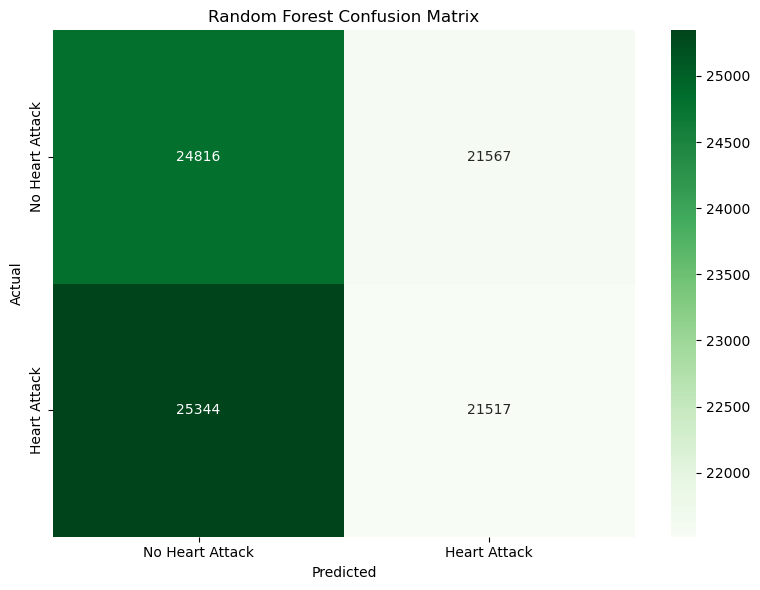

In [140]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

INFERENCE:

Critical Performance Breakdown:
- False Positives (25,344): Excessively flagging healthy patients as high-risk - could lead to unnecessary invasive testing and patient anxiety
- False Negatives (21,567): Missing nearly as many true heart attacks as it detects (21,517), representing potentially life-threatening oversights

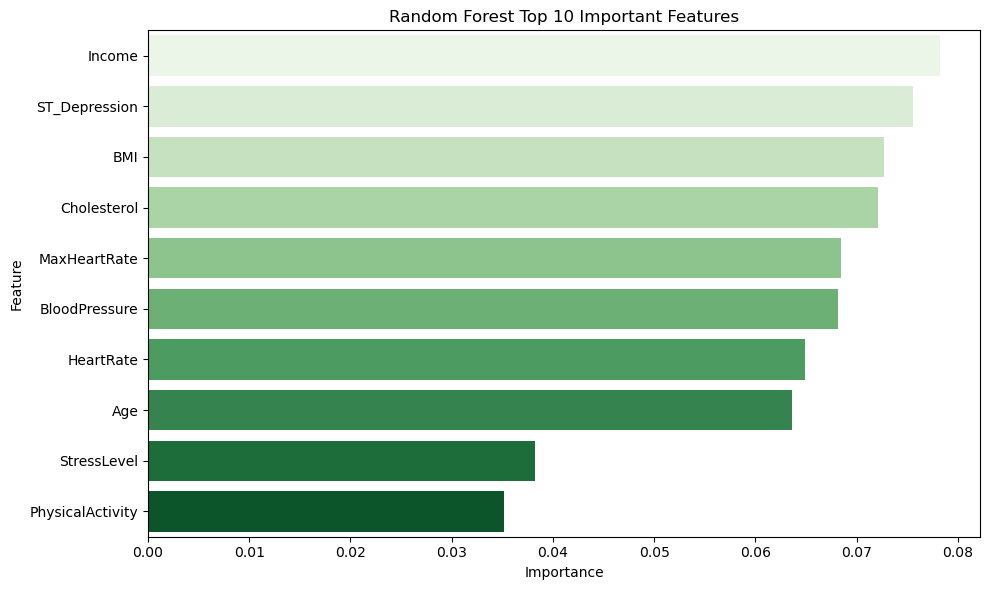

In [387]:
feature_importance_rf = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_rf.head(10),
    hue='Feature', 
    dodge=False, 
    palette='Greens',
    legend=False 
)

plt.title('Random Forest Top 10 Important Features')
plt.tight_layout()
plt.show()

INFERENCE: 

- The bar chart displays the top 10 most important features as determined by the Random Forest model for predicting the target variable.
- 'Income' stands out as the most influential feature, exhibiting the highest importance score. Following 'Income', 'ST_Depression' and 'BMI' also demonstrate significant importance in the model's predictive process.
- The remaining features including 'Cholesterol', 'BloodPressure', 'MaxHeartRate', 'HeartRate', 'Age', 'StressLevel', and 'PhysicalActivity', show relatively lower but still notable contributions to the model's decision-making.

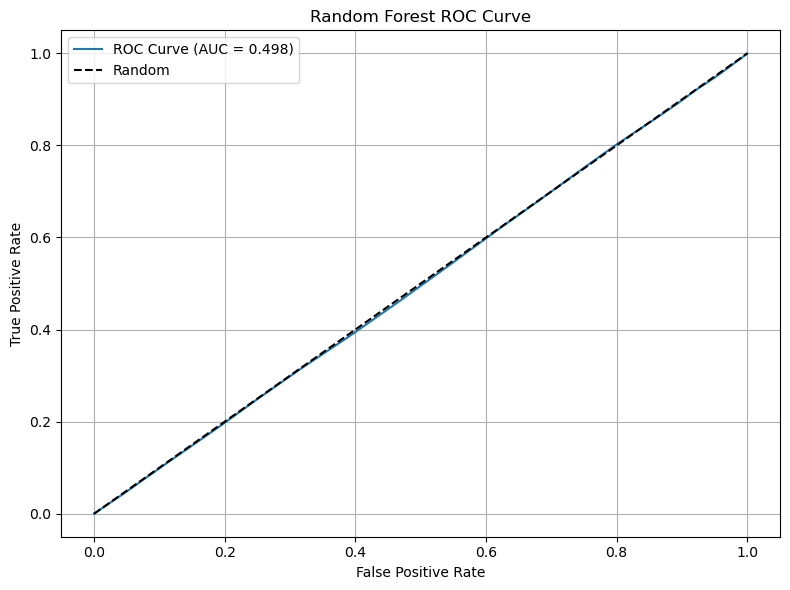

In [156]:
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='ROC Curve (AUC = ' + str(round(roc_auc_rf,3)) + ')')
plt.plot([0,1],[0,1],'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

INFERENCE

- AUC of 0.498 is worse than random guessing (0.5)
- Model demonstrates negative discriminative ability - reversing predictions might yield better results
- Confidence intervals likely include 0.5, indicating no statistical significance

##NAIVE BAYES CLASSIFICATION

In [144]:
from sklearn.naive_bayes import GaussianNB

In [146]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [148]:
y_pred_nb = nb.predict(x_test)

In [152]:
acc_nb = accuracy_score(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)


print("Naive Bayes Accuracy:", acc_nb*100)
print("\
Naive Bayes Classification Report:\n", class_report_nb)


Naive Bayes Accuracy: 50.02252155634679
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51     46383
           1       0.50      0.49      0.49     46861

    accuracy                           0.50     93244
   macro avg       0.50      0.50      0.50     93244
weighted avg       0.50      0.50      0.50     93244



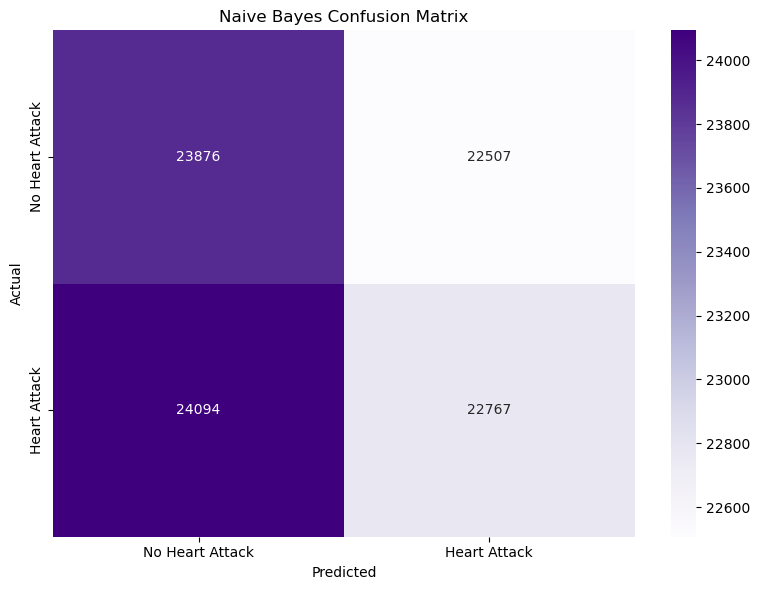

In [154]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.tight_layout()
plt.show()

INFERENCE:

- False Positives: 24,094 (healthy patients incorrectly classified as high-risk)
- False Negatives: 22,507 (actual at-risk patients missed)

In [421]:
probabilities = nb.predict_proba(x_test)
predictions = nb.predict(x_test)

print("Probabilities for first 5 test cases:")
print("[Probability of heart attack, Probability of being healthy]")
for i in range(5):
    print(f"Case {i+1}: {probabilities[i].round(2)} - Predicted: {'Healthy' if predictions[i] == 1 else 'At Risk'}")

Probabilities for first 5 test cases:
[Probability of heart attack, Probability of being healthy]
Case 1: [0.5 0.5] - Predicted: Healthy
Case 2: [0.5 0.5] - Predicted: At Risk
Case 3: [0.49 0.51] - Predicted: Healthy
Case 4: [0.49 0.51] - Predicted: Healthy
Case 5: [0.5 0.5] - Predicted: Healthy


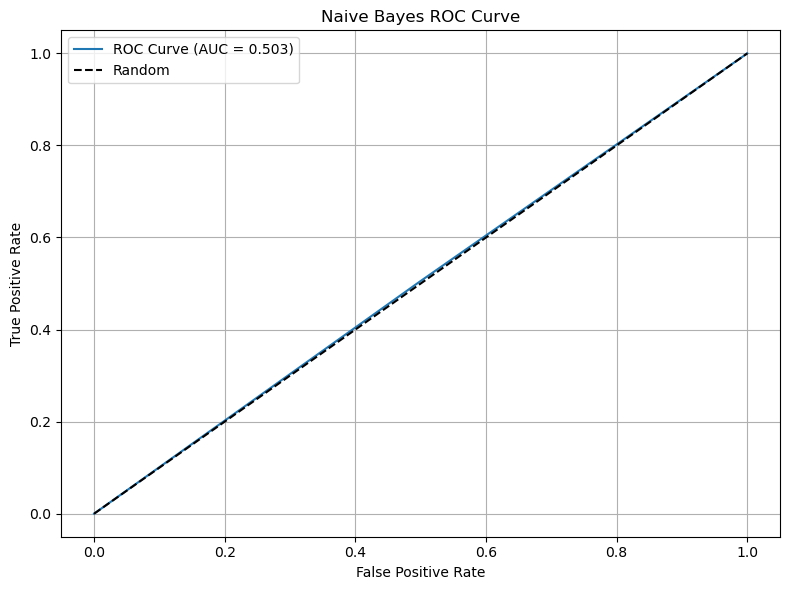

In [158]:
roc_auc_nb = roc_auc_score(y_test, y_pred)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label='ROC Curve (AUC = ' + str(round(roc_auc_nb, 3)) + ')')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

INFERENCE:

- This model’s AUC is also 0.5 which is better than random forest.
- The ROC curve follows the random guess line.

##XGBoost using SHAP

In [269]:
from xgboost import XGBClassifier
import shap

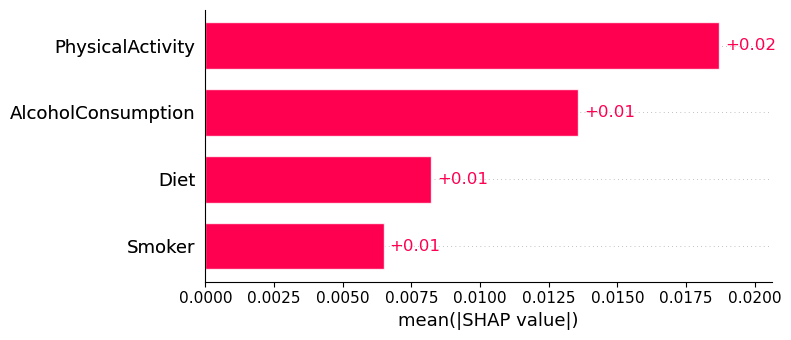

In [286]:
X_tr, X_te, Y_tr, Y_te = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y)

numeric_cols = X_tr.select_dtypes(include=['int64','float64']).columns
ss = StandardScaler()
X_tr[numeric_cols] = ss.fit_transform(X_tr[numeric_cols])
X_te[numeric_cols] = ss.transform(X_te[numeric_cols])

tita_model = XGBClassifier(eval_metric='logloss', random_state=42)
tita_model.fit(X_tr, Y_tr)

explainer = shap.Explainer(tita_model)
shap_values = explainer(X_tr)

to_plot = [c for c in X_tr.columns if 'Diet' in c or 'AlcoholConsumption' in c or 'Smoker' in c or 'PhysicalActivity' in c]
plt.figure(figsize=(8,6))
shap.plots.bar(shap_values[:, to_plot], max_display=len(to_plot), show=False)
plt.tight_layout()
plt.show()

INFERENCE:

- Mean of the absolute SHAP values — the higher this is, the more impact that feature has on the model’s output (heart attack risk prediction).
  
- PhysicalActivity: Most impactful factor. Low activity increases heart attack risk. Promoting physical activity could significantly lower risk.
- Smoker: Smoking is a known risk factor but in this dataset, has relatively lower SHAP value—could be due to correlation with other factors or sample bias.

#CLUSTERING

##K MEANS CLUSTERING

In [214]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [218]:
sample_data = data.sample(n=5000, random_state=42)

features = ['Age', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI', 'MaxHeartRate', 'ST_Depression']
d = sample_data[features].dropna()

print('Selected sample size: ' + str(len(d)))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(d)

Selected sample size: 5000


Inertia values: [34999.99999999998, 31169.787108145734, 28862.740362647244, 26932.71837741886, 25493.66887783092, 24232.904109844654]


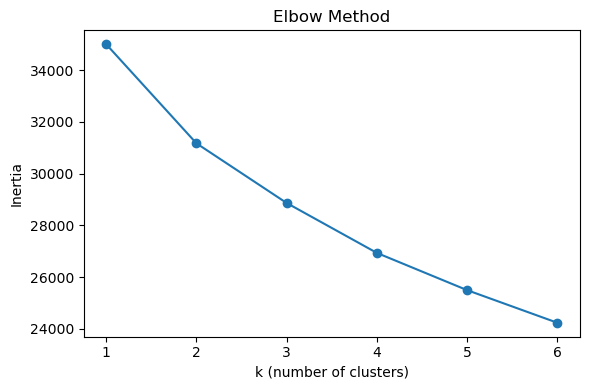

In [220]:
# Elbow method
inertia = []
k_range = range(1, 7)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
print('Inertia values: ' + str(inertia))

plt.figure(figsize=(6,4))
plt.plot(list(k_range), inertia, '-o')
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.tight_layout()
plt.show()

Silhouette scores: [0.10856406995864545, 0.09617204962796698, 0.10114226679740611, 0.10089140586818214]


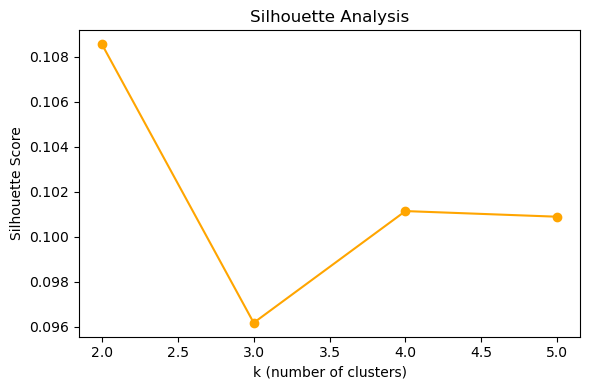

In [355]:
# Silhouette scores for k=2..5
#Silhouette score (range: -1 to 1) 
sil_scores = []
k_sil = range(2, 6)
for k in k_sil:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))
print('Silhouette scores: ' + str(sil_scores))

plt.figure(figsize=(6,4))
plt.plot(list(k_sil), sil_scores, '-o', color='orange')
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

INFERENCE:

- Both analyses suggest modest gains beyond k=2 or 3, so we chose k = 3 (Low, Medium, High risk).

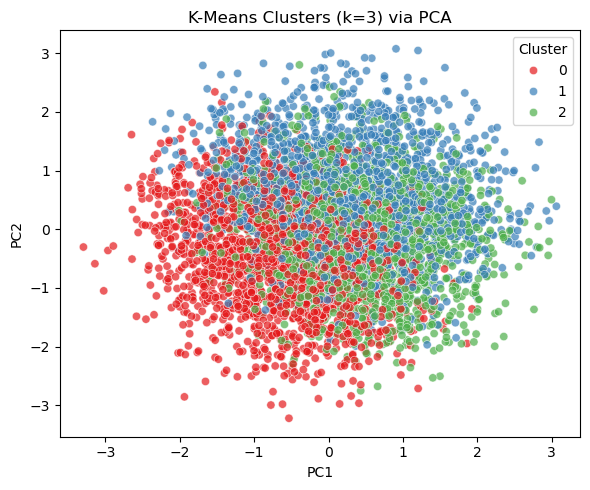

In [248]:
# Assuming k=3 
k_opt = 3
km_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels_final = km_final.fit_predict(X_scaled)
d['Cluster'] = labels_final

# PCA for 2D plot
t = PCA(n_components=2, random_state=42)
comp = t.fit_transform(X_scaled)
pca_df = pd.DataFrame(comp, columns=['PC1','PC2'])
pca_df['Cluster'] = labels_final

plt.figure(figsize=(6,5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('K-Means Clusters (k=3) via PCA')
plt.tight_layout()
plt.show()

In [246]:
#Cluster summary
summary = d.groupby('Cluster')[features].mean().round(2)
counts = d['Cluster'].value_counts().sort_index()
print('Cluster Counts:')
print(counts)
print('\n\nCluster Feature Means:')
print(summary)

Cluster Counts:
Cluster
0    1746
1    1674
2    1580
Name: count, dtype: int64


Cluster Feature Means:
           Age  Cholesterol  BloodPressure  HeartRate    BMI  MaxHeartRate  \
Cluster                                                                      
0        62.48       193.51         140.84     106.85  28.78        148.26   
1        40.32       205.23         129.64      84.72  28.35        150.46   
2        69.10       204.94         134.42      75.17  30.08        151.16   

         ST_Depression  
Cluster                 
0                 2.51  
1                 2.50  
2                 2.46  


INFERENCE:

- Cluster 0 (n=1,746) is middle‑aged (≈62 yrs), moderate blood pressure and cholesterol, and mid‑range heart rate — likely “medium risk.
- Cluster 1 (n=1,674) skews younger (≈40 yrs) but with similar cholesterol, slightly lower blood pressure and heart rate — “low risk.”
- Cluster 2 (n=1,580) is oldest (≈69 yrs), higher BMI and moderate cholesterol and blood pressure — “high risk.”

##HIERARCHIAL CLUSTERING

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

features = ['Age', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI', 'MaxHeartRate', 'ST_Depression']
sample_small = data[features].dropna().sample(n=200, random_state=42)
sample_full = data[features].dropna().sample(n=5000, random_state=42)
print('Sample small for dendrogram: ' + str(len(sample_small)))
print('Sample full for clustering summary: ' + str(len(sample_full)))

scaler = StandardScaler()
X_small = scaler.fit_transform(sample_small)
X_full = scaler.fit_transform(sample_full)

Sample small for dendrogram: 200
Sample full for clustering summary: 5000


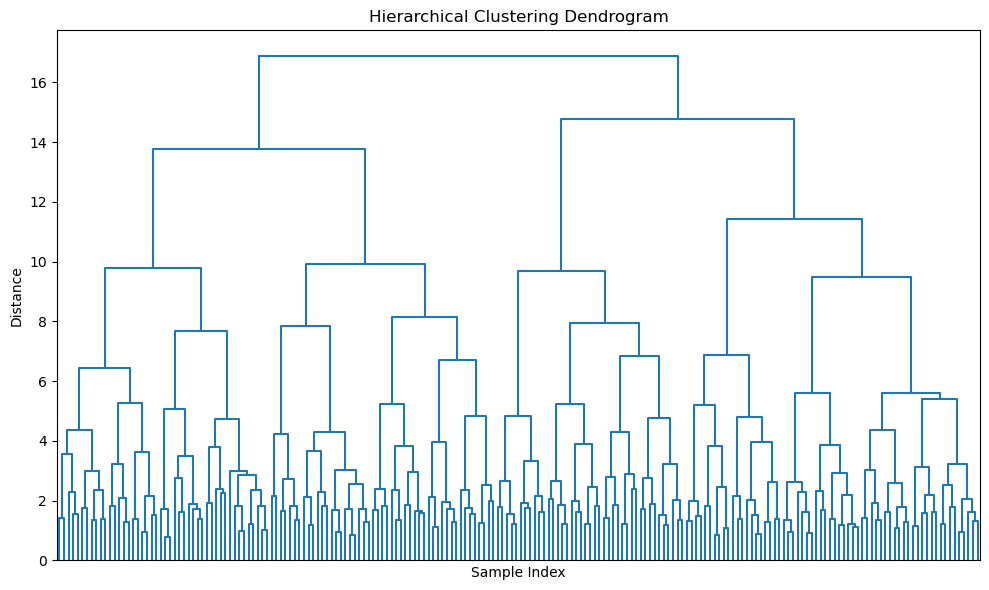

In [49]:
link = linkage(X_small, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(link, no_labels=True, count_sort=True, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

INFERENCE:

- The dendrogram shows how patients merge step by step based on similarity of their scaled health factors. Short vertical links indicate very similar individuals, whereas long links show more dissimilar merges.
- Dendrogram has approximately 9 to 10 distinct levels of merges (or hierarchical steps).
- This means clustering process performed 9–10 successive agglomerations, gradually combining smaller clusters into bigger ones.

In [52]:
#Tree cut into 3 parts
clusters_full = fcluster(linkage(X_full, method='ward'), t=3, criterion='maxclust')
sample_full['Cluster'] = clusters_full

# Cluster Summary 
group_counts = sample_full['Cluster'].value_counts().sort_index()
group_means = sample_full.groupby('Cluster')[features].mean().round(2)

print('Cluster counts:')
print(group_counts)
print('\n\nCluster feature means:')
print(group_means)

Cluster counts:
Cluster
1    1917
2    1147
3    1936
Name: count, dtype: int64


Cluster feature means:
           Age  Cholesterol  BloodPressure  HeartRate    BMI  MaxHeartRate  \
Cluster                                                                      
1        54.89       206.34         131.02      77.18  28.25        141.61   
2        54.20       198.31         135.86     102.16  24.85        140.59   
3        61.14       197.43         138.59      94.03  32.32        163.65   

         ST_Depression  
Cluster                 
1                 2.74  
2                 2.32  
3                 2.34  


INFERENCE:

- Cutting the tree at three clusters yields counts of roughly 1,917 in Cluster 1, 1,147 in Cluster 2, and 1,936 in Cluster 3.
  
- Cluster 1 (mean Age ≈ 54.9, ST_Depression ≈ 2.74) and Cluster 2 (Age ≈ 54.2, ST_Depression ≈ 2.32) share similar ages but differ in heart rate (Cluster 2 much higher HR) and BMI (Cluster 2 lower BMI) — suggesting one subgroup with elevated cardiac response.
- Cluster 3 is oldest on average (Age ≈ 61.1) with the highest BMI and MaxHeartRate — aligning with a higher‑risk profile.

Overall, hierarchical clustering reveals nested relationships among patients and highlights subgroups that might merit different intervention strategies.

In [55]:
recommendations = {}

for cluster_id, row in group_means.iterrows():
    recs = []
    if row['Cholesterol'] > 240:
        recs.append("Reduce saturated fat intake and avoid processed foods.")
    if row['BMI'] > 25:
        recs.append("Adopt a calorie-controlled diet and engage in regular physical activity.")
    if row['BloodPressure'] > 130:
        recs.append("Reduce salt intake, avoid alcohol, and practice stress-reducing techniques.")
    if row['ST_Depression'] > 1:
        recs.append("Consider a stress test or further cardiac evaluation.")
    if row['MaxHeartRate'] < 140:
        recs.append("Increase aerobic exercise to improve cardiovascular fitness.")
    if row['HeartRate'] > 90:
        recs.append("Incorporate meditation or breathing exercises to lower resting heart rate.")
    
   
    if not recs:
        recs.append("Maintain current lifestyle and attend regular health check-ups.")

    recommendations[cluster_id] = recs

for cluster_id, recs in recommendations.items():
    print(f"\nRecommendations for Cluster {cluster_id}:\n")
    for r in recs:
        print(f" - {r}")



Recommendations for Cluster 1:

 - Adopt a calorie-controlled diet and engage in regular physical activity.
 - Reduce salt intake, avoid alcohol, and practice stress-reducing techniques.
 - Consider a stress test or further cardiac evaluation.

Recommendations for Cluster 2:

 - Reduce salt intake, avoid alcohol, and practice stress-reducing techniques.
 - Consider a stress test or further cardiac evaluation.
 - Incorporate meditation or breathing exercises to lower resting heart rate.

Recommendations for Cluster 3:

 - Adopt a calorie-controlled diet and engage in regular physical activity.
 - Reduce salt intake, avoid alcohol, and practice stress-reducing techniques.
 - Consider a stress test or further cardiac evaluation.
 - Incorporate meditation or breathing exercises to lower resting heart rate.


INFERENCE:

- Behavioral Grouping and Recommendations - recommendations for lifestyle changes for each cluster
